## montamos Drive

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
path='drive/My Drive/keepcoding/deep_learning/'


## Importar librerías

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Carga de datos e imágenes

In [65]:
# Nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2023-02-19 15:46:20--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [      <=>           ]  54.31M  3.09MB/s    in 18s     

2023-02-19 15:46:39 (3.06 MB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [66]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('airbnb-listings.csv', sep=';', decimal='.')
full_df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.33,"40.41010608050749,-3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,...,10.0,10.0,10.0,NaN,NaN,strict,2,2.69,"40.416968822636726,-3.7094389211089993","Host Has Profile Pic,Host Identity Verified,Is..."
2,2070750,https://www.airbnb.com/rooms/2070750,20170407214119,2017-04-08,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,none,-,...,9.0,10.0,9.0,NaN,NaN,flexible,4,0.60,"40.40970517560235,-3.7135611928841086","Host Has Profile Pic,Host Identity Verified,Is..."
3,9832499,https://www.airbnb.com/rooms/9832499,20170407214119,2017-04-08,PLAZA DE ESPAÑA - Único - Gimnasio.,"Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...",none,NaN,...,10.0,10.0,10.0,VT-1520,NaN,strict,9,3.56,"40.42319271738103,-3.7112486513892","Host Is Superhost,Host Has Profile Pic,Host Id..."
4,1868170,https://www.airbnb.com/rooms/1868170,20170407214119,2017-04-08,"Loft/duplex 150m2, 3 double rooms","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...",none,NaN,...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.13,"40.416513932601625,-3.7178427529546973","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [67]:
# vamos a ver de cuantos registros disponemos y de cuantas variables
full_df.shape

(14001, 89)

In [68]:
# columnas
full_df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [69]:
#eliminamos filas sin precio (variable a predecir)
full_df=full_df.dropna(subset=['Price']).reset_index()

full_df.head()

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.33,"40.41010608050749,-3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
1,1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,...,10.0,10.0,10.0,NaN,NaN,strict,2,2.69,"40.416968822636726,-3.7094389211089993","Host Has Profile Pic,Host Identity Verified,Is..."
2,2,2070750,https://www.airbnb.com/rooms/2070750,20170407214119,2017-04-08,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,none,...,9.0,10.0,9.0,NaN,NaN,flexible,4,0.60,"40.40970517560235,-3.7135611928841086","Host Has Profile Pic,Host Identity Verified,Is..."
3,3,9832499,https://www.airbnb.com/rooms/9832499,20170407214119,2017-04-08,PLAZA DE ESPAÑA - Único - Gimnasio.,"Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...",none,...,10.0,10.0,10.0,VT-1520,NaN,strict,9,3.56,"40.42319271738103,-3.7112486513892","Host Is Superhost,Host Has Profile Pic,Host Id..."
4,4,1868170,https://www.airbnb.com/rooms/1868170,20170407214119,2017-04-08,"Loft/duplex 150m2, 3 double rooms","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...",none,...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.13,"40.416513932601625,-3.7178427529546973","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [75]:
full_df=full_df.drop(full_df[full_df['Thumbnail Url']=='https://a0.muscache.com/im/pictures/4e024bba-d52e-481a-a591-9e645e2e99e4.jpg?aki_policy=small'].index[0], axis=0)
full_df=full_df.drop(full_df[full_df['Thumbnail Url']=='https://a0.muscache.com/im/pictures/a0ae69cc-1a45-44ea-b84a-9ce4f014f0b7.jpg?aki_policy=small'].index[0], axis=0)


In [76]:
import imageio as io
import numpy as np
import cv2
n_images = 2000
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = full_df['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images[i_aux] = cv2.resize(img, (224, 224))
        good_urls.append(i_img)
        i_aux += 1
        print(f'Imagen {i_img} descargada')
        print(len(good_urls))
    except IOError as err:
        pass

Imagen 0 descargada
1
Imagen 1 descargada
2
Imagen 2 descargada
3
Imagen 3 descargada
4
Imagen 4 descargada
5
Imagen 5 descargada
6
Imagen 7 descargada
7
Imagen 8 descargada
8
Imagen 10 descargada
9
Imagen 11 descargada
10
Imagen 12 descargada
11
Imagen 13 descargada
12
Imagen 14 descargada
13
Imagen 15 descargada
14
Imagen 16 descargada
15
Imagen 18 descargada
16
Imagen 19 descargada
17
Imagen 20 descargada
18
Imagen 21 descargada
19
Imagen 24 descargada
20
Imagen 25 descargada
21
Imagen 27 descargada
22
Imagen 33 descargada
23
Imagen 35 descargada
24
Imagen 36 descargada
25
Imagen 37 descargada
26
Imagen 41 descargada
27
Imagen 42 descargada
28
Imagen 44 descargada
29
Imagen 47 descargada
30
Imagen 48 descargada
31
Imagen 49 descargada
32
Imagen 51 descargada
33
Imagen 54 descargada
34
Imagen 57 descargada
35
Imagen 59 descargada
36
Imagen 61 descargada
37
Imagen 62 descargada
38
Imagen 64 descargada
39
Imagen 67 descargada
40
Imagen 69 descargada
41
Imagen 70 descargada
42
Imagen 72

Creo un dataframe con toda la información: datos + imágenes

In [77]:
#la lista good_urls nos da el índice con el que se corresponden los datos

data=full_df.iloc[good_urls, :]
print(f'shape de df es:'+str(data.shape))

shape de df es:(2000, 90)


In [78]:
# guardamos las imágenes en drive
np.save(path+'images.npy', images)
data.to_csv(path+'data.csv', index=False)


# División en train y test

In [79]:
# division de datos y guardado
from sklearn.model_selection import train_test_split
np.random.seed(7)

train, test = train_test_split(data, test_size=0.1, shuffle=False, random_state=7)
im_train, im_test = train_test_split(images, test_size=0.1, shuffle=False, random_state=7)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv(path+'train.csv', index=False)
test.to_csv(path+'test.csv', index=False)

np.save(path+'im_train.npy', im_train)
np.save(path+'im_test.npy', im_test)



Dimensiones del dataset de training: (1800, 90)
Dimensiones del dataset de test: (200, 90)


In [81]:
# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 
import numpy as np
import pandas as pd

train = pd.read_csv(path+'train.csv')
im_train=np.load(path+'im_train.npy', allow_pickle=True)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de training: {im_train.shape}')

Dimensiones del dataset de training: (1800, 90)
Dimensiones del dataset de training: (1800, 224, 224, 3)


In [82]:
train.head()

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.33,"40.41010608050749,-3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
1,1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,...,10.0,10.0,10.0,NaN,NaN,strict,2,2.69,"40.416968822636726,-3.7094389211089993","Host Has Profile Pic,Host Identity Verified,Is..."
2,2,2070750,https://www.airbnb.com/rooms/2070750,20170407214119,2017-04-08,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,none,...,9.0,10.0,9.0,NaN,NaN,flexible,4,0.60,"40.40970517560235,-3.7135611928841086","Host Has Profile Pic,Host Identity Verified,Is..."
3,3,9832499,https://www.airbnb.com/rooms/9832499,20170407214119,2017-04-08,PLAZA DE ESPAÑA - Único - Gimnasio.,"Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...",none,...,10.0,10.0,10.0,VT-1520,NaN,strict,9,3.56,"40.42319271738103,-3.7112486513892","Host Is Superhost,Host Has Profile Pic,Host Id..."
4,4,1868170,https://www.airbnb.com/rooms/1868170,20170407214119,2017-04-08,"Loft/duplex 150m2, 3 double rooms","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...",none,...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.13,"40.416513932601625,-3.7178427529546973","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [84]:
train.columns

Index(['index', 'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name',
       'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url',
       'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since',
       'Host Location', 'Host About', 'Host Response Time',
       'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url',
       'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
    

# Preprocesado y data cleaning

Aquí voy a realizar el datacleaning utilizado en el módulo de machine learning

In [85]:
columns_text=['Host Name','Name','Summary','Space','Description','Neighborhood Overview','Host About','Transit','Access','Interaction','House Rules','Features']
columns_pais=['City','State','Market','Smart Location','Country','Country Code']
columns_neighbourhood=['Street','Neighbourhood','Neighbourhood Cleansed','Neighbourhood Group Cleansed','Zipcode']

#vemos porcentaje de nulos en los datos
train_clean=train.replace('none', np.NaN)
train_clean=train_clean.replace('nan', np.NaN)
pct_null=train_clean.isnull().sum().sort_values(ascending=False)/len(train)
print(pct_null[pct_null>0.6].index)
train_clean = train_clean.drop(pct_null[pct_null>0.6].index, axis=1)


# eliminamos columnas no relevantes
train_clean = train_clean.drop(train_clean.columns[train_clean.columns.str.contains("Url")], axis=1)
train_clean = train_clean.drop(train_clean.columns[train_clean.columns.str.contains("URL")], axis=1)
train_clean = train_clean.drop(train_clean.columns[train_clean.columns.str.contains("ID")], axis=1)
train_clean = train_clean.drop(train_clean.columns[train_clean.columns.str.contains("Scraped")], axis=1)
train_clean = train_clean.drop(columns_text, axis=1)
# borrar columnas referidas a localizacion
train_clean = train_clean.drop(['Geolocation'], axis=1)
train_clean = train_clean.drop(columns_pais, axis=1)
train_clean = train_clean.drop(['Host Location','Host Neighbourhood'], axis=1)
train_clean = train_clean.drop(['Street','Neighbourhood','Neighbourhood Cleansed','Zipcode'], axis=1)


Index(['Has Availability', 'Jurisdiction Names', 'Host Acceptance Rate',
       'Experiences Offered', 'License', 'Square Feet', 'Monthly Price',
       'Weekly Price', 'Notes'],
      dtype='object')


In [86]:
# fillna 
train_clean['Security Deposit']=train_clean['Security Deposit'].fillna(0)

# rellenar columnas numericas 

col_fillna=['Cleaning Fee','Review Scores Location','Review Scores Value','Review Scores Checkin',
            'Review Scores Accuracy','Review Scores Communication','Review Scores Cleanliness','Review Scores Rating',
           'Reviews per Month','Host Response Rate','Bathrooms','Beds','Bedrooms','Host Total Listings Count','Host Listings Count']

for i in col_fillna:
    train_clean[i].fillna(train_clean[i].mean(),inplace=True)
    
# cambiar columnas con fechas por dias hasta dia de referencia
col_fechas=['Host Since','First Review','Last Review']
dia_ref=pd.to_datetime('2022-01-14')


for i in col_fechas:
    train_clean[i]=(dia_ref-pd.to_datetime(train_clean[i])).dt.days
    train_clean[i]=train_clean[i].fillna(0)
    

In [87]:
#variable host verifications

mode_host_verif=train_clean['Host Verifications'].mode()[0]
train_clean['Host Verifications'].fillna(mode_host_verif,inplace=True)
train_clean['Num Host Verifications']=train_clean['Host Verifications'].str.split(',').str.len()
train_clean = train_clean.drop('Host Verifications', axis=1)

#variable Amenities
mode_amenities=train_clean['Amenities'].mode()[0]

train_clean['Amenities'].fillna(mode_amenities,inplace=True)
train_clean['Num Amenities']=train_clean['Amenities'].str.split(',').str.len()
train_clean = train_clean.drop('Amenities', axis=1)

In [88]:
# property type tiene demasiados valores distintos, resumo los que tienen menos de 10 valores en other
iprop=train_clean['Property Type'].value_counts()<10
iprop=iprop[iprop==True].index
iprop=iprop.insert(1,'Timeshare')
iprop=iprop.insert(1,'Boat')

train_clean.loc[train_clean[train_clean['Property Type'].isin(iprop)].index,['Property Type']]='Other'

In [89]:
# VARIABLEs encoded
col_toencode=['Host Response Time','Neighbourhood Group Cleansed','Property Type','Room Type','Bed Type','Cancellation Policy','Calendar Updated']

train_clean_encoded=train_clean

from sklearn import preprocessing
dict_le={}

for i in col_toencode: 
    le=preprocessing.LabelEncoder()
    le.fit(train_clean_encoded[i])
    dict_le[i]=le
    train_clean_encoded[str(i)+'_encoded']=le.transform(train_clean_encoded[i])
    train_clean_encoded=train_clean_encoded.drop(i,axis=1)
    


In [90]:
train_clean_encoded.shape

(1800, 43)

In [91]:
len(train_clean_encoded.columns)

43

In [92]:
im_train.shape

(1800, 224, 224, 3)

In [93]:
# Guardamos train clean
train_clean_encoded.to_csv(path+'train_clean.csv', index=False)


# Creamos etiquetas de las imagenes

In [94]:
y_train=train_clean_encoded['Price']

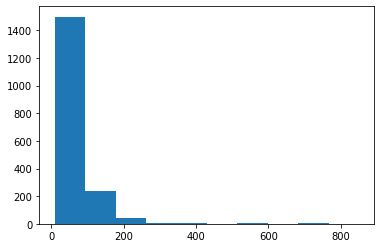

In [95]:
# y un rango para clasificación (del 1 al 3 por ejemplo: barato, normal, caro)
import matplotlib.pyplot as plt
plt.hist(y_train, bins=10)
plt.show()

In [96]:
y_class = []
for x in y_train:
    # barato
    if x <= 50:
        y_class.append(0)
    elif x <=150:
        y_class.append(1)
    else:
        y_class.append(2)

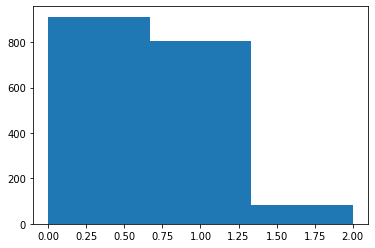

In [97]:
# veamos cómo ha quedado la distribución al convertirla a 3 clases
plt.hist(y_class, bins=3)
plt.show()

In [98]:
# guardamos la etiqueta de clase
y_class=pd.DataFrame(y_class)
y_class.to_csv(path+'train_y_class.csv', index=False)
